In [1]:
from fbprophet import Prophet
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [29]:
%matplotlib inline
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()

In [10]:
data_file = "https://github.com/chris1610/pbpython/blob/master/data/All-Web-Site-Data-Audience-Overview.xlsx?raw=True"
df = pd.read_excel(data_file)
df.head()

,Day Index,Sessions
0,2014-09-25,1
1,2014-09-26,4
2,2014-09-27,8
3,2014-09-28,42
4,2014-09-29,233


In [11]:
df.dtypes

Day Index    datetime64[ns]
Sessions              int64
dtype: object

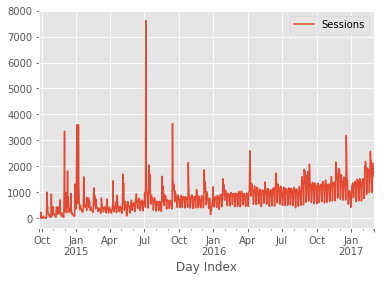

In [12]:
df.set_index('Day Index').plot()

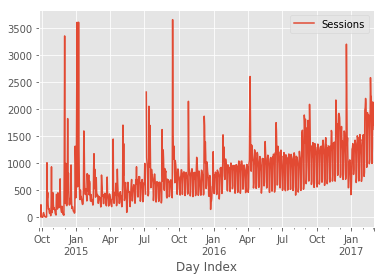

In [13]:
df.loc[(df['Sessions'] > 5000), 'Sessions'] = np.nan
df.set_index('Day Index').plot();

In [14]:
df['Sessions'] = np.log(df['Sessions'])
df.head()

,Day Index,Sessions
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


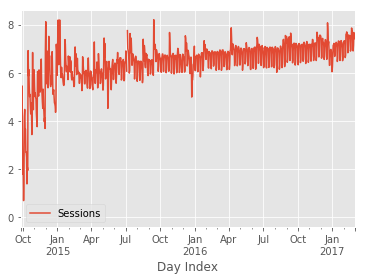

In [15]:
df.set_index('Day Index').plot();

In [17]:
#Rename the columns to comply with the prophet API
df.columns = ["ds", "y"]
df.head()

,ds,y
0,2014-09-25,0.000000
1,2014-09-26,1.386294
2,2014-09-27,2.079442
3,2014-09-28,3.737670
4,2014-09-29,5.451038


In [18]:
#Create a prophet object and fit it to our data

m1 = Prophet()
m1.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [20]:

future1 = m1.make_future_dataframe(periods=365)
future1.tail()

,ds
1251,2018-02-27
1252,2018-02-28
1253,2018-03-01
1254,2018-03-02
1255,2018-03-03


In [21]:
forecast1 = m1.predict(future1)

In [22]:
forecast1.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2014-09-25,3.645377,3.028904,4.184695,3.645377,3.645377,-0.008542,-0.008542,-0.008542,0.184480,0.184480,0.184480,-0.193022,-0.193022,-0.193022,0.0,0.0,0.0,3.636835
1,2014-09-26,3.670428,2.814249,4.085143,3.670428,3.670428,-0.224531,-0.224531,-0.224531,0.000969,0.000969,0.000969,-0.225500,-0.225500,-0.225500,0.0,0.0,0.0,3.445897
2,2014-09-27,3.695479,2.292191,3.503456,3.695479,3.695479,-0.776530,-0.776530,-0.776530,-0.520672,-0.520672,-0.520672,-0.255858,-0.255858,-0.255858,0.0,0.0,0.0,2.918950
3,2014-09-28,3.720530,2.440109,3.659766,3.720530,3.720530,-0.668826,-0.668826,-0.668826,-0.385333,-0.385333,-0.385333,-0.283493,-0.283493,-0.283493,0.0,0.0,0.0,3.051705
4,2014-09-29,3.745582,3.062015,4.348992,3.745582,3.745582,-0.024358,-0.024358,-0.024358,0.283474,0.283474,0.283474,-0.307832,-0.307832,-0.307832,0.0,0.0,0.0,3.721224


In [23]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1251,2018-02-27,7.841940,6.702960,9.142907
1252,2018-02-28,7.781125,6.545176,9.083912
1253,2018-03-01,7.748980,6.545248,9.107108
1254,2018-03-02,7.546113,6.263168,8.927544
1255,2018-03-03,7.005274,5.725667,8.362910


In [24]:
np.exp(forecast1[['yhat', 'yhat_lower', 'yhat_upper']].tail())

,yhat,yhat_lower,yhat_upper
1251,2545.137083,814.814088,9347.898081
1252,2394.968402,695.879483,8812.374392
1253,2319.205802,695.929519,9019.177519
1254,1893.369686,524.879137,7536.730907
1255,1102.432047,306.637659,4285.145298


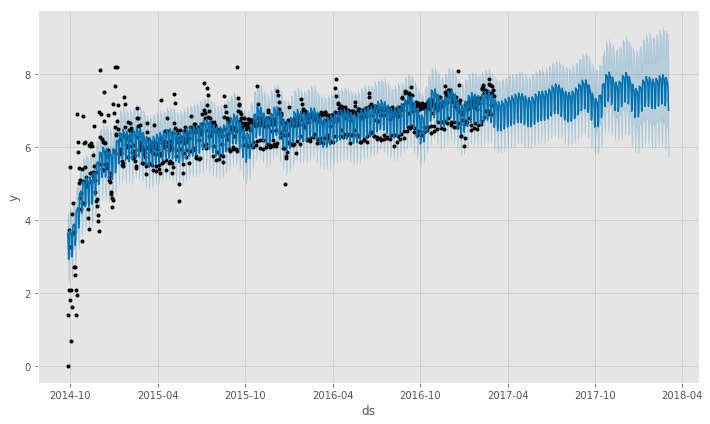

In [30]:
m1.plot(forecast1);

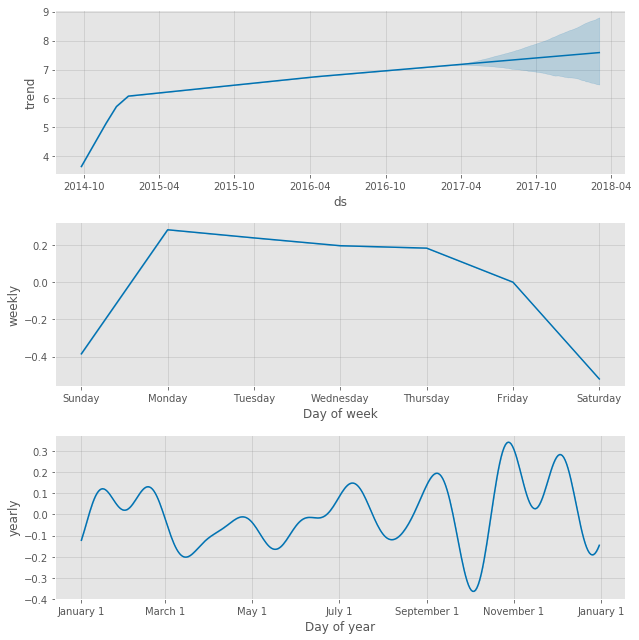

In [32]:
m1.plot_components(forecast1);

In [33]:
articles = pd.DataFrame({
  'holiday': 'publish',
  'ds': pd.to_datetime(['2014-09-27', '2014-10-05', '2014-10-14', '2014-10-26', '2014-11-9', 
                        '2014-11-18', '2014-11-30', '2014-12-17', '2014-12-29', '2015-01-06',
                        '2015-01-20', '2015-02-02', '2015-02-16', '2015-03-23', '2015-04-08',
                        '2015-05-04', '2015-05-17', '2015-06-09', '2015-07-02', '2015-07-13',
                        '2015-08-17', '2015-09-14', '2015-10-26', '2015-12-07', '2015-12-30',
                        '2016-01-26', '2016-04-06', '2016-05-16', '2016-06-15', '2016-08-23',
                        '2016-08-29', '2016-09-06', '2016-11-21', '2016-12-19', '2017-01-17',
                        '2017-02-06', '2017-02-21', '2017-03-06']),
  'lower_window': 0,
  'upper_window': 5,
})

In [34]:
articles.head()

,holiday,ds,lower_window,upper_window
0,publish,2014-09-27,0,5
1,publish,2014-10-05,0,5
2,publish,2014-10-14,0,5
3,publish,2014-10-26,0,5
4,publish,2014-11-09,0,5


In [35]:

m2 = Prophet(holidays=articles).fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/anaconda3/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [37]:
future2 = m2.make_future_dataframe(periods=90)

In [38]:
forecast2 = m2.predict(future2)

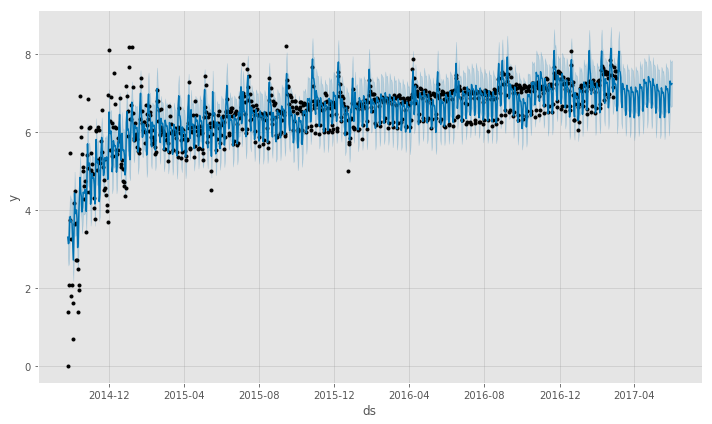

In [39]:
m2.plot(forecast2);

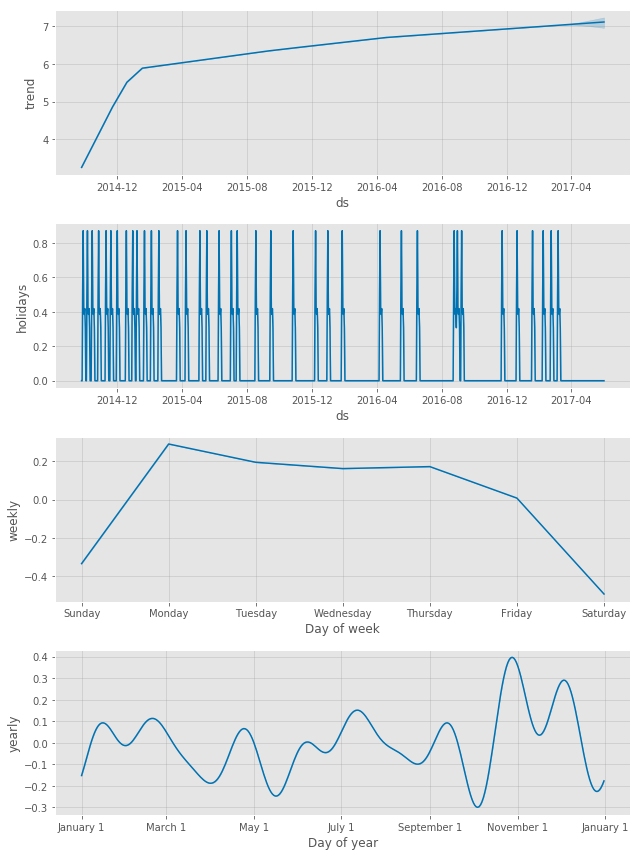

In [40]:
m2.plot_components(forecast2);